In [1]:
import matplotlib
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as ss
from matplotlib import style
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)
import pandas as pd

from sklearn.decomposition import RandomizedPCA, PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn

In [2]:
# df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/hiv_diff_expression.txt', sep='\t', index_col='genes')
df_expr = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/immu_expression_matrix.txt', sep='\t', index_col='genes')

In [3]:
df_expr = df_expr.T

In [4]:
df_expr.shape

(82, 808)

In [5]:
gene_cols = np.unique(df_expr.columns.values)

In [7]:
df_expr.columns.value_counts()

AIRE        2
FCGR2B      1
NFATC2      1
CRADD       1
RHCE        1
C1QB        1
NFATC1      1
EMR3        1
CCL8        1
IL10RB      1
CCL7        1
NFATC4      1
CCL1        1
KIR2DL1     1
MRE11A      1
CCL2        1
CD300E      1
RHD         1
CD300A      1
CD300C      1
HAMP        1
CSF3        1
CSF2        1
RFX1        1
C1QC        1
CYSLTR1     1
MARCO       1
RFX5        1
TIRAP       1
IRF2        1
           ..
SLC3A2      1
TNFRSF1A    1
TOLLIP      1
TNFRSF1B    1
CCR9        1
CD79B       1
C6          1
CD9         1
C7          1
C2          1
C3          1
ICAM1       1
ICAM2       1
ICAM3       1
ICAM4       1
C9          1
IFNB1       1
CD84        1
CD82        1
CD83        1
CD80        1
CD81        1
STAT1       1
STAT2       1
STAT3       1
STAT4       1
STAT6       1
CD79A       1
NCR2        1
TAP1        1
Name: genes, dtype: int64

In [6]:
gene_cols.shape

(807,)

In [6]:
df_expr = df_expr[gene_cols].copy()

In [12]:
df_expr.shape

(82, 1040)

In [7]:
df_stat = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/hiv_status.txt', sep='\t',header= None, names=['lib','hiv'])

In [8]:
df_stat.shape

(82, 2)

In [9]:
df_stat.head(2)

,lib,hiv
0,A37700,Positive
1,A37701,Negative


In [10]:
merged = pd.merge(df_expr, df_stat, left_index=True, right_on='lib', how='outer')

In [11]:
merged.shape

(82, 1042)

In [11]:
merged.columns

Index([u'COLEC12', u'IL17RA', u'SOD1', u'HRH4', u'IFNAR2', u'SDF2L1',
       u'VPREB1', u'PNP', u'IGLL1', u'RNASE7',
       ...
       u'ITGB3', u'CLEC5A', u'ITGB3', u'ACE', u'SIGLEC5', u'IKBKE', u'CCL3',
       u'IKBKG', u'lib', u'hiv'],
      dtype='object', name=u'genes', length=1042)

In [15]:
merged.shape

(82, 1042)

In [20]:
merged.head(2)

genes,COLEC12,IL17RA,SOD1,HRH4,IFNAR2,SDF2L1,VPREB1,PNP,IGLL1,RNASE7,...,ITGB3,CLEC5A,ITGB3,ACE,SIGLEC5,IKBKE,CCL3,IKBKG,lib,hiv
0,0.7201,6.3268,47.6432,0.0175,6.7852,21.7496,0.0,32.7004,0.0,74.0282,...,0.5035,1.3127,0.5035,1.2163,0.3697,6.3847,3.8358,0.4449,A37700,Positive
1,0.7438,5.2315,155.6015,0.0051,5.0398,27.8376,0.0,18.7429,0.0,0.3494,...,0.1216,0.5618,0.1216,1.4951,0.1037,9.0201,5.2952,0.9416,A37701,Negative


In [21]:
np.unique(gene_cols).shape

(810,)

In [19]:
merged[gene_cols].head(2)

genes,COLEC12,IL17RA,SOD1,HRH4,IFNAR2,IFNAR2,SDF2L1,VPREB1,PNP,IGLL1,...,CLEC5A,ITGB3,ITGB3,ACE,ACE,SIGLEC5,SIGLEC5,IKBKE,CCL3,IKBKG
0,0.7201,6.3268,47.6432,0.0175,6.7852,6.7852,21.7496,0.0,32.7004,0.0,...,1.3127,0.5035,0.5035,1.2163,1.2163,0.3697,0.3697,6.3847,3.8358,0.4449
1,0.7438,5.2315,155.6015,0.0051,5.0398,5.0398,27.8376,0.0,18.7429,0.0,...,0.5618,0.1216,0.1216,1.4951,1.4951,0.1037,0.1037,9.0201,5.2952,0.9416


In [16]:
df_expr_scaled = merged[gene_cols.tolist()].copy()

In [17]:
df_expr_scaled.shape

(82, 2988)

In [12]:
%time df_expr_scaled[gene_cols] = StandardScaler().fit_transform(merged[gene_cols].values)

NameError: name 'df_expr_scaled' is not defined

In [14]:
# df_scaled[['BNIP3L', 'CHD2']].plot.hist(bins=30, alpha=0.4)

In [15]:
df_scaled.head(2)

genes,COLEC12,IL17RA,SOD1,HRH4,IFNAR2,SDF2L1,VPREB1,PNP,IGLL1,RNASE7,...,KLRC2,KLRK1,ITGB3,CLEC5A,ITGB3,ACE,SIGLEC5,IKBKE,CCL3,IKBKG
A37700,-0.394770,0.276266,-0.822906,-0.249874,-0.312738,-0.82905,-0.284871,0.212346,-0.34107,1.003768,...,-0.153438,-0.578264,-0.281859,-0.133916,-0.281859,-0.578835,-0.240542,-0.422717,-0.276306,-0.336919
A37701,-0.384141,-0.370467,2.192550,-0.710818,-0.902102,-0.56308,-0.284871,-0.651030,-0.34107,-0.409801,...,2.588176,1.420430,-0.346562,-0.509837,-0.346562,-0.432052,-0.605446,0.195728,-0.068353,1.569383


In [2]:
# df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/immune_expression/hiv_diff_expression.txt', sep='\t', index_col='genes')
# print(df.shape)


In [20]:
merged.hiv.value_counts()

Positive    43
Negative    39
Name: hiv, dtype: int64

In [18]:
df.columns

Index([u'COLEC12', u'IL17RA', u'SOD1', u'HRH4', u'IFNAR2', u'SDF2L1',
       u'VPREB1', u'PNP', u'IGLL1', u'RNASE7',
       ...
       u'KLRC2', u'KLRK1', u'ITGB3', u'CLEC5A', u'ITGB3', u'ACE', u'SIGLEC5',
       u'IKBKE', u'CCL3', u'IKBKG'],
      dtype='object', name=u'genes', length=1040)

In [24]:
expr = merged[gene_cols].copy()

In [134]:
TSNE?

In [29]:
# Create a regular PCA model 
pca = PCA(n_components=50)

In [30]:
expression = pca.fit_transform(expr)

In [31]:
expression.shape

(82, 50)

In [36]:
# Create a Randomized PCA model that takes two components
randomized_tsne = TSNE(n_components=2, learning_rate=100, perplexity=10, verbose=True)
# randomized_tsne = RandomizedPCA(n_components=2)
# randomized_tsne = PCA(n_components=2)
# Fit and transform the data to the model
reduced_data_rtsne = randomized_tsne.fit_transform(expression)

# reduced_data_rtsne.shape
# print(reduced_data_rtsne)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 82 / 82
[t-SNE] Mean sigma: 9.719742
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.699208
[t-SNE] Error after 175 iterations: 0.699208


In [41]:
reduced_df = pd.DataFrame(reduced_data_rtsne, columns=['x', 'y'])

In [ ]:
reduced

In [ ]:
statuses = merged['hiv']

for i in range(len(statuses)):
#     print(i)
    if statuses[i]=='Positive':
        x = reduced_data_rtsne[i][0]
        y = reduced_data_rtsne[i][1]
        plt.scatter(x,y,c='red')
    elif statuses[i]=='Negative':
        x = reduced_data_rtsne[i][0]
        y = reduced_data_rtsne[i][1]
        plt.scatter(x,y,c='blue')    
# plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('tsne1')
plt.ylabel('tnse2')
# plt.title("tsne Scatter Plot")
# plt.show()

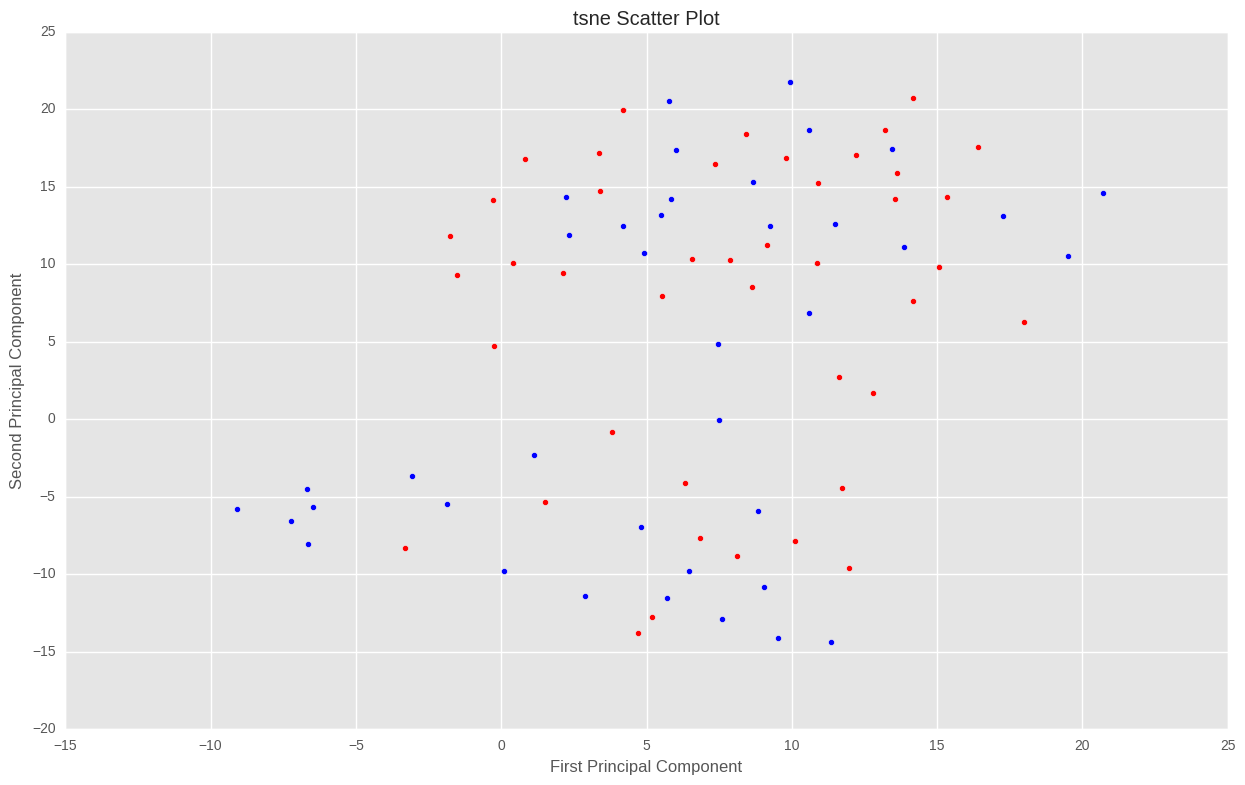

In [38]:
statuses = merged['hiv']

for i in range(len(statuses)):
#     print(i)
    if statuses[i]=='Positive':
        x = reduced_data_rtsne[i][0]
        y = reduced_data_rtsne[i][1]
        plt.scatter(x,y,c='red')
    elif statuses[i]=='Negative':
        x = reduced_data_rtsne[i][0]
        y = reduced_data_rtsne[i][1]
        plt.scatter(x,y,c='blue')    
# plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('tsne1')
plt.ylabel('tnse2')
# plt.title("tsne Scatter Plot")
# plt.show()